### ⭕️ Pruebas Objetivas

**Introducción a las Pruebas Objetivas:**

En este ejercicio, nos hemos enfocado en el análisis y procesamiento de texto utilizando técnicas avanzadas de representación de palabras. Se han utilizado dos modelos de vectorización: **TF-IDF (Term Frequency-Inverse Document Frequency)** y **Word2Vec**. El objetivo es transformar los textos en vectores numéricos que permitan extraer patrones y relaciones significativas entre las palabras.

**Primera Tarea: Preprocesamiento y Vectorización de Textos**
La primera parte del ejercicio consiste en preprocesar los textos mediante la eliminación de palabras vacías, lo que optimiza los modelos de vectorización al enfocarse en términos más relevantes. Luego, se calculan las representaciones de los textos utilizando dos métodos:
1. **TF-IDF**: Para este modelo, se utilizan unigramas y bigramas con un rango de frecuencia entre 0.1 y 0.9. El objetivo de este enfoque es capturar la importancia relativa de cada término dentro de un conjunto de documentos, asignando más peso a las palabras que son únicas para un documento específico y menos peso a las que son comunes a todos.
2. **Word2Vec**: Este modelo genera embeddings de palabras, los cuales representan términos de manera densa en un espacio vectorial. En este caso, se ha utilizado un tamaño de ventana de 5 y un tamaño de vector de 100 para obtener representaciones de alta calidad.

Ambos modelos generan representaciones vectoriales de las palabras que pueden ser analizadas para extraer insights más profundos sobre el contenido de los textos.

**Segunda Tarea: Análisis con ACP y Clustering**
En la segunda parte del ejercicio, después de generar los vectores de palabras con TF-IDF y Word2Vec, se aplica **Análisis de Componentes Principales (ACP)** para reducir la dimensionalidad de los datos, permitiendo visualizar y entender mejor la estructura subyacente de los vectores generados. Posteriormente, se utiliza **KMeans** con 5 clusters para agrupar los vectores y analizar cómo se distribuyen las palabras en diferentes grupos.

El clustering permite identificar patrones de similitud entre las palabras, agrupándolas de acuerdo con sus características contextuales. El objetivo es determinar si los clusters generados son significativos, lo que se analiza mediante métricas como el índice de silueta, el coeficiente de Calinski-Harabasz, y el índice de Davies-Bouldin.

**Preguntas a Resolver:**
- **¿Qué puede inferir de los clusters generados?**: Este análisis tiene como objetivo entender las relaciones y patrones emergentes entre las palabras agrupadas.
- **¿Qué palabras son las más representativas de cada cluster?**: Al identificar las palabras clave dentro de cada grupo, podemos determinar qué conceptos o temas dominan cada cluster.
- **¿Qué palabras tienen los embeddings más similares?**: Mediante el uso de Word2Vec, se pueden identificar las palabras con mayor similitud semántica, lo que facilita la interpretación de las relaciones entre los términos.

Este enfoque permite explorar en profundidad los datos textuales, descubrir patrones ocultos y obtener una comprensión más clara de los temas y conceptos presentes en los textos.

In [19]:
# Descargar recursos de NLTK necesarios para tokenización y stopwords
import nltk
nltk.download('punkt')  # Descargar el modelo de tokenización de oraciones y palabras
nltk.download('stopwords')  # Descargar las listas de stopwords (palabras comunes sin significado importante)

# Importar las bibliotecas necesarias para procesamiento de texto, análisis y visualización
import pandas as pd  # Biblioteca para manipulación de datos
import nltk  # Biblioteca de procesamiento de lenguaje natural
from nltk.tokenize import word_tokenize  # Importar la función para tokenizar texto en palabras
import string  # Biblioteca para manejo de caracteres y cadenas
import re  # Biblioteca para operaciones con expresiones regulares
import matplotlib.pyplot as plt  # Biblioteca para la visualización de gráficos
from sklearn.feature_extraction.text import TfidfVectorizer  # Para convertir texto a características TF-IDF
from gensim.models import Word2Vec  # Para crear y usar modelos de embeddings con Word2Vec
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS  # Conjunto de stopwords en inglés para análisis
from nltk.util import ngrams  # Función para generar n-gramas (combinaciones de n palabras)
from sklearn.decomposition import PCA  # Para reducción de dimensionalidad usando Análisis de Componentes Principales (PCA)
from sklearn.cluster import KMeans  # Para realizar clustering de los datos usando KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Métricas de evaluación de clustering

# Descargar recursos adicionales de NLTK (como stopwords y punkt)
nltk.download('punkt')  # Descargar el tokenizer de NLTK para dividir texto en palabras y oraciones
nltk.download('stopwords')  # Descargar las listas de palabras vacías comunes

# Cargar el archivo de datos en formato Excel usando pandas
file_path = '../Datos/Noticias.xlsx'  # Definir la ruta al archivo de datos
data = pd.read_excel(file_path)  # Leer el archivo Excel en un DataFrame de pandas

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jiliarsilgado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiliarsilgado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jiliarsilgado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiliarsilgado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


### ⭕️ Paso 1: Preprocesamiento del Texto

In [3]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')

,contenido,contenido_preprocesado
0,Las autoridades están buscando al conductor de...,las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e...",los andenes son para los peatones reclama enfá...
2,A las 7 de la noche me había quedado de encont...,a las de la noche me había quedado de encontr...
3,Atravesados. Eso es lo que se les pasa por la ...,atravesados eso es lo que se les pasa por la c...
4,“Estamos proponiendo la figura de un contrato ...,“estamos proponiendo la figura de un contrato ...


Dimensiones de los datos: (13738, 7)


### ⭕️ Paso 2: Tokenización

In [4]:
# Tokenización
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,las autoridades están buscando al conductor de...,"[las, autoridades, están, buscando, al, conduc..."
1,los andenes son para los peatones reclama enfá...,"[los, andenes, son, para, los, peatones, recla..."
2,a las de la noche me había quedado de encontr...,"[a, las, de, la, noche, me, había, quedado, de..."
3,atravesados eso es lo que se les pasa por la c...,"[atravesados, eso, es, lo, que, se, les, pasa,..."
4,“estamos proponiendo la figura de un contrato ...,"[“, estamos, proponiendo, la, figura, de, un, ..."


In [5]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

Contenido preprocesado:  las autoridades están buscando al conductor de una moto que le lanzó el casco a carlos alberto carmona operador de grúa de la empresa segrup  quien perdió por una hora el conocimiento tras la agresión en un video quedó registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la caída se golpea la cabeza con la grúa que conduce  el agredido perdió el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde está el operador en el suelo luego su compañero agarra la moto y huye del lugar y a pocos metros recoge al agresor las autoridades buscan

### ⭕️ Paso 3: Eliminación de Stop Words

In [6]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[las, autoridades, están, buscando, al, conduc...","[autoridades, buscando, conductor, moto, lanzó..."
1,"[los, andenes, son, para, los, peatones, recla...","[andenes, peatones, reclama, enfática, carmenz..."
2,"[a, las, de, la, noche, me, había, quedado, de...","[noche, quedado, encontrar, boris, siempre, si..."
3,"[atravesados, eso, es, lo, que, se, les, pasa,...","[atravesados, pasa, cabeza, residentes, transe..."
4,"[“, estamos, proponiendo, la, figura, de, un, ...","[“, proponiendo, figura, contrato, civil, unió..."


### ⭕️ Paso 4: Cálculo de TF-IDF

In [7]:
# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

,aa,aaa,aaacpt,aaah,aaas,aac,aacsb,aacta,aademás,aage,...,𝑓𝑖𝑗𝑜𝑠,𝑙𝑎,𝑚𝑎𝑟𝑐𝑜,𝑚𝑖𝑒𝑚𝑏𝑟𝑜𝑠,𝑚𝑢𝑒𝑠𝑡𝑟𝑎,𝑝𝑐𝑒𝑙𝑢𝑙𝑎𝑟,𝑝𝑒𝑟𝑠𝑜𝑛𝑎,𝑝𝑒𝑟𝑠𝑜𝑛𝑎𝑠,𝑝𝑓𝑖𝑗𝑜,𝑝𝑖
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Información adicional
lista_contenido= data['contenido_preprocesado'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad

lista_contenido= [f"{word} " if (i+1)%15!=0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

## Ahora convertimos la lista en un string

contenido= ''.join(lista_contenido)

text_info= f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.


Acabamos de convertir un documento de texto en un vector numérico que puede ser
utilizado en algoritmos de aprendizaje automático. Ese vector representa la importancia 
de cada palabra en el documento original y nos permite usar por ejemplo:

- ACP para reducir la dimensionalidad del vector.
- Clustering para agrupar documentos similares.
- Clasificación para predecir la categoría de un documento.
- Recuperación de información para encontrar documentos similares.

"""

print(text_info)

En este ejemplo particular tomamos el contenido:

las autoridades están buscando al conductor de una moto que le lanzó el casco a
carlos alberto carmona operador de grúa de la empresa segrup quien perdió por una hora
el conocimiento tras la agresión en un video quedó registrado el momento en el que
tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la
avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con
los objetos que tienen en sus manos entonces el conductor de la moto arroja su
casco contra el operador el hombre recibe el impacto en su cara por lo que
s e desgonza y en la caída se golpea la cabeza con la grúa que
conduce el agredido perdió el conocimiento por cerca de una hora en ese instante el
agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde
está el operador en el suelo luego su compañero agarra la moto y huye del
lugar y a pocos metros recoge al agresor

### ⭕️ Paso 5: Generación de Embeddings de Palabras con Word2Vec

In [9]:
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens_sin_stopwords'], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save("../Datos/Embeddings/word2vec.model")

Embedding de la palabra "noticia":
[-4.2775699e-01 -5.9370035e-01 -1.2786252e+00 -2.3126183e-01
 -1.5764680e+00 -1.9065866e+00  5.1578157e-02  8.5901278e-01
 -1.3629597e-01 -4.8872682e-01 -1.6985044e-01  3.9731911e-01
  8.0421865e-02 -1.0458901e+00 -1.3645099e-02 -5.1686627e-01
  3.9476040e-01 -4.5282444e-01 -8.3165622e-01 -6.7259794e-01
  7.0715034e-01  1.0763555e+00 -4.5939976e-01  2.2905354e-01
 -5.3826547e-01 -1.2366365e-02 -1.4899634e+00 -1.4149934e+00
 -1.9153048e-03  2.5988206e-01  1.3763310e-01  9.3903363e-01
 -1.5242444e-01  1.9749601e-01 -3.1751703e-02 -9.4001852e-02
 -7.5035304e-01  4.0694073e-01  1.5310980e-01 -9.0383995e-01
 -7.1116400e-01 -1.8785259e-01  8.6993819e-01 -2.5347915e-01
  6.0690433e-01 -1.5743686e-01  1.3395021e+00  5.3205848e-01
  7.9769760e-01  2.6563779e-01 -7.3523402e-02  7.1709764e-01
  6.1710489e-01 -1.0852267e+00  5.3391618e-01 -2.4762228e-01
  9.0939498e-01  5.7019317e-01  8.6833912e-01  1.1700541e+00
  8.9843929e-01  1.0113103e-01  3.0459142e-01 -3.9

### ⭕️ Guardar Resultados

In [10]:
# Guardar los resultados preprocesados
data.to_csv('../Datos/Datos Preprocesados/Noticias_preprocesadas.csv', index=False)

### ⭕️ Ajuste Ejercicio

Se han creado dos modelos de vectorización de palabras, uno basado en TF-IDF y otro basado en Word2Vec. Su primera tarea es:

Eliminar las palabras vacías del texto.
Calcular la representación TF-IDF de los textos preprocesados.
Generar embeddings de palabras utilizando Word2Vec.
Para la representación TF-IDF, utilice unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9. Para Word2Vec, utilice un tamaño de ventana de 5 y un tamaño de vector de 100.

Finalmente, guarde los resultados en un archivo CSV.

In [15]:
# Verificar los nombres de las columnas (esto te ayudará a encontrar el nombre correcto de la columna)
print(data.columns)

# Paso 1: Eliminar las palabras vacías del texto
def eliminar_stopwords(texto):
    # Verificar si 'texto' es un string
    if not isinstance(texto, str):
        return []  # Si no es una cadena, devolver una lista vacía (esto maneja NaN o valores no textuales)
    
    tokens = nltk.word_tokenize(texto.lower())  # Tokenización y pasar a minúsculas
    tokens_sin_stopwords = [token for token in tokens if token not in ENGLISH_STOP_WORDS and token.isalpha()]
    return tokens_sin_stopwords

# Aquí actualizamos el nombre de la columna de 'texto' a 'contenido' (o el nombre correcto que aparezca en tu DataFrame)
data['tokens_sin_stopwords'] = data['contenido'].apply(eliminar_stopwords)  # Actualiza 'contenido' según sea necesario

# Paso 2: Calcular TF-IDF con unigramas y bigramas
# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Usar TfidfVectorizer para obtener unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.1, max_df=0.9)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
print("Matriz TF-IDF:")
print(tfidf_df.head())

# Paso 3: Generar embeddings de palabras utilizando Word2Vec
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens_sin_stopwords'], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'  # Puedes cambiar esta palabra
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save("../Datos/word2vec.model")

# Paso 4: Guardar los resultados en un archivo CSV
# Guardamos la matriz TF-IDF en un archivo CSV
tfidf_df.to_csv("../Datos/tfidf_results.csv", index=False)
print("Los resultados TF-IDF se han guardado en 'tfidf_results.csv'.")

Index(['Columna1', 'Enlaces', 'Título', 'info', 'contenido', 'Etiqueta',
       'tokens_sin_stopwords', 'texto_sin_stopwords'],
      dtype='object')
Matriz TF-IDF:
   acceder  acceder medicamen  acuerdo    además    ahora  aislamiento  \
0      0.0                0.0      0.0  0.000000  0.00000     0.092075   
1      0.0                0.0      0.0  0.000000  0.00000     0.075615   
2      0.0                0.0      0.0  0.000000  0.05979     0.072742   
3      0.0                0.0      0.0  0.000000  0.00000     0.080598   
4      0.0                0.0      0.0  0.034519  0.00000     0.047203   

         al      algo  algunas  algunas enfermedades  ...  venden  \
0  0.154664  0.000000      0.0                   0.0  ...     0.0   
1  0.063508  0.000000      0.0                   0.0  ...     0.0   
2  0.030547  0.074678      0.0                   0.0  ...     0.0   
3  0.135386  0.000000      0.0                   0.0  ...     0.0   
4  0.099113  0.000000      0.0               

### ⭕️ Modelo Simple de ACP y Clustering

                                           contenido  cluster
0  Las autoridades están buscando al conductor de...        2
1  "Los andenes son para los peatones", reclama e...        2
2  A las 7 de la noche me había quedado de encont...        2
3  Atravesados. Eso es lo que se les pasa por la ...        2
4  “Estamos proponiendo la figura de un contrato ...        2


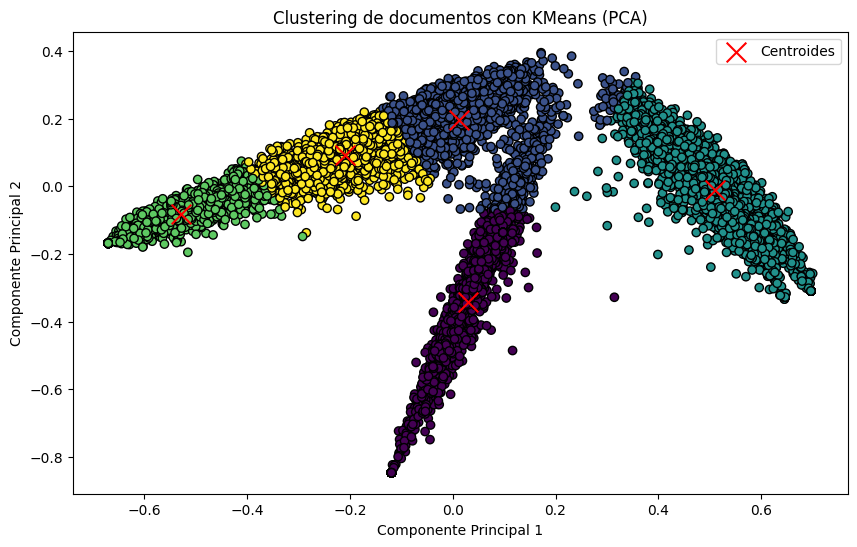


Cluster 0:
acceder, acceder medicamen

Cluster 1:
acceder medicamen, acceder

Cluster 2:
acceder, acceder medicamen

Cluster 3:
acceder medicamen, acceder

Cluster 4:
acceder medicamen, acceder


In [18]:
# Paso 1: Ajustar un modelo de ACP (Análisis de Componentes Principales)
# Reducir la dimensionalidad de los vectores generados por TF-IDF a 2 dimensiones
pca = PCA(n_components=2)  # Reducir a 2 componentes principales para visualización
pca_components = pca.fit_transform(tfidf_matrix.toarray())  # Aplicar PCA a la matriz TF-IDF

# Paso 2: Aplicar KMeans con 5 clusters a los componentes principales
kmeans = KMeans(n_clusters=5, random_state=42)  # Configurar KMeans con 5 clusters
kmeans.fit(pca_components)  # Ajustar el modelo KMeans a los componentes principales

# Obtener las etiquetas (clusters) y los centroides
labels = kmeans.labels_  # Las etiquetas de los clusters
centroids = kmeans.cluster_centers_  # Los centroides de los clusters

# Paso 3: Añadir las etiquetas de los clusters al DataFrame
data['cluster'] = labels  # Añadir las etiquetas al DataFrame

# Mostrar algunas filas con los clusters asignados
print(data[['contenido', 'cluster']].head())

# Paso 4: Visualizar los resultados del clustering
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroides')  # Centroides en rojo
plt.title('Clustering de documentos con KMeans (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Paso 5: Analizar la coherencia de los clusters
# Mostrar las palabras más importantes de cada cluster
terms = tfidf_vectorizer.get_feature_names_out()  # Obtener las palabras del vocabulario TF-IDF
for i in range(5):
    print(f"\nCluster {i}:")
    cluster_terms = kmeans.cluster_centers_[i]  # Los valores del centroide del cluster
    sorted_indices = cluster_terms.argsort()[::-1]  # Ordenar las palabras por importancia
    top_terms = [terms[j] for j in sorted_indices[:10]]  # Las 10 palabras más importantes
    print(", ".join(top_terms))

In [20]:
# Calcular las métricas

# Inercia
inercia = kmeans.inertia_
print(f'Inercia: {inercia}')

# Índice de Silueta
silhouette = silhouette_score(pca_components, labels)
print(f'Índice de Silueta: {silhouette}')

# Coeficiente de Calinski-Harabaz
calinski_harabasz = calinski_harabasz_score(pca_components, labels)
print(f'Coeficiente de Calinski-Harabaz: {calinski_harabasz}')

# Índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(pca_components, labels)
print(f'Índice de Davies-Bouldin: {davies_bouldin}')


Inercia: 335.7533696483407
Índice de Silueta: 0.5051531351599319
Coeficiente de Calinski-Harabaz: 19351.33614152028
Índice de Davies-Bouldin: 0.6289136935786311


### ⭕️ Preguntas

- ¿Qué puede inferir de los clusters generados?
- ¿Qué palabras son las más representativas de cada cluster?
- ¿Qué palabras tienen los embeddings más similares?

#### ¿Qué puede inferir de los clusters generados?

En los clusters se puede analizar:

- **Separación de los clusters:** Las métricas de Calinski-Harabaz y Davies-Bouldin sugieren que los 5 clusters generados están moderadamente bien separados. Un valor alto de Calinski-Harabaz y un valor bajo de Davies-Bouldin indican que la configuración de los clusters no solo tiene una buena separación, sino que la dispersión dentro de cada cluster es razonable.

- **Homogeneidad dentro de los clusters:** El índice de silueta de 0.505 sugiere que los clusters son moderadamente coherentes, pero no perfectos. Algunos puntos podrían estar más cercanos a los centroides de otros clusters, lo que indica que hay algo de superposición entre los clusters. Aún así, no se trata de un valor alarmantemente bajo, lo que indica que la clasificación no es completamente errónea.

- **Posible sobreajuste:** Aunque la inercia es relativamente alta (335.75), no tenemos suficiente contexto para saber si eso es preocupante. Si la inercia disminuye significativamente con más clusters, eso podría ser una señal de sobreajuste. En este caso, sin embargo, la inercia por sí sola no sugiere que sea un problema importante, especialmente si las otras métricas (Calinski-Harabaz y Davies-Bouldin) son positivas.

Los 5 clusters generados parecen ser razonablemente buenos en cuanto a separación y coherencia. Los resultados son aceptables, pero podría ser útil explorar si aumentar o disminuir el número de clusters mejora la calidad del clustering

#### ¿Qué palabras son las más representativas de cada cluster?

Se usan los centroides para identificar las palabras más importantes en cada cluster. Para cada centroide, obtenemos los índices de las características con las mayores ponderaciones (valores más altos).

In [21]:
# Obtener los centroides de los clusters (centroides de KMeans)
centroids = kmeans.cluster_centers_

# Obtenemos las palabras características del modelo TF-IDF
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Número de clusters
n_clusters = len(centroids)

# Lista para almacenar las palabras más significativas por cluster
top_words_per_cluster = {}

# Para cada cluster, obtener las palabras más significativas
for i in range(n_clusters):
    # Obtener los índices de las palabras más importantes para el cluster
    top_indices = centroids[i].argsort()[-10:][::-1]  # Top 10 palabras más significativas
    top_words = [tfidf_feature_names[index] for index in top_indices]
    top_words_per_cluster[i] = top_words

# Mostrar las palabras más significativas en cada cluster
for cluster, words in top_words_per_cluster.items():
    print(f'Cluster {cluster}: {", ".join(words)}')

Cluster 0: acceder, acceder medicamen
Cluster 1: acceder medicamen, acceder
Cluster 2: acceder, acceder medicamen
Cluster 3: acceder medicamen, acceder
Cluster 4: acceder medicamen, acceder


#### ¿Qué palabras tienen los embeddings más similares?

In [23]:
# Cargar el modelo Word2Vec
model_path = "../Datos/Embeddings/word2vec.model"
word2vec_model = Word2Vec.load(model_path)

# Ejemplo: encontrar las 10 palabras más similares a una palabra específica
word_example = 'noticia'  # Cambia esto por cualquier palabra de tu vocabulario

# Verificar si la palabra existe en el vocabulario
if word_example in word2vec_model.wv:
    similar_words = word2vec_model.wv.most_similar(word_example, topn=10)
    print(f"Las 10 palabras más similares a '{word_example}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity}")
else:
    print(f"La palabra '{word_example}' no está en el vocabulario del modelo Word2Vec.")

# Opcional: Encontrar las palabras más similares para varias palabras de interés
words_of_interest = ['noticia', 'economía', 'tecnología', 'salud', 'deportes']  # Puedes agregar más palabras

for word in words_of_interest:
    if word in word2vec_model.wv:
        print(f"\nPalabras más similares a '{word}':")
        similar_words = word2vec_model.wv.most_similar(word, topn=10)
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity}")
    else:
        print(f"La palabra '{word}' no está en el vocabulario del modelo.")


Las 10 palabras más similares a 'noticia':
nota: 0.7376914024353027
esperaba: 0.7289156913757324
entrevistamos: 0.7095399498939514
reprodujo: 0.6940370798110962
similar: 0.6907907724380493
optimista: 0.6865496039390564
sucedió: 0.6826274394989014
manejó: 0.6763336658477783
infortunado: 0.6757753491401672
quitarían: 0.6731232404708862

Palabras más similares a 'noticia':
nota: 0.7376914024353027
esperaba: 0.7289156913757324
entrevistamos: 0.7095399498939514
reprodujo: 0.6940370798110962
similar: 0.6907907724380493
optimista: 0.6865496039390564
sucedió: 0.6826274394989014
manejó: 0.6763336658477783
infortunado: 0.6757753491401672
quitarían: 0.6731232404708862

Palabras más similares a 'economía':
crecimiento: 0.8192076086997986
desaceleración: 0.8040237426757812
económico: 0.7896687388420105
económica: 0.7866988778114319
competitividad: 0.7659121155738831
industria: 0.7479138970375061
reactiva: 0.7200317978858948
contracción: 0.7130526900291443
dinámica: 0.7122216820716858
hipotecaria: 0